<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RigobertoVega/blob/main/Modulo_2__Pre_Processing_Data_in_Python_A01793132.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-Processing Data in Python
###Rigoberto Vega Escudero A01793132

Here we will test some data preprocessing techniques.

Data pre-processing is a necessary step in data
analysis.

It is the process of converting or mapping data from one “raw” form into another format to make it ready for further analysis.
Data pre-processing is also often called “data cleaning” or “data wrangling”, and there are likely other terms.

#First upload libraries and file to use

In [115]:
#First we impor pandas
import pandas as pd
import numpy as np
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
#Use the readcsv method, note here is that our data does not have column labels or headers, so we need to specify that in our module as below
df = pd.read_csv(url, header= None)

df #prints the entire dataframe (not recommended for large datasets)
#Adding a list with all the headers names that we will use
headers = ["symboling", "normalized-losses", "make","fuel-type","aspiration:","num-of-doors",
           "body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers #Code to remplace the headers name with the list elements
df


,symboling,normalized-losses,make,fuel-type,aspiration:,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


##Dealing with Missing values

When no data value is stored for a feature for a particular observation, we say this feature has a “missing value”.

Usually, missing value in dataset appears as “?”, “N/A”, 0 or just a blank cell.

Each situation is different and should be judged differently. But here we will have some options.


- The first is to check if the person or group that collected the data can go back and find what the actual value should be.

Another possibility is just to remove the data where that missing value is found.
- When you drop data, you can either drop the whole variable or just the single data entry with the missing value.

Removing data will have the consecuence that we need to take a look on the impact of remove that.

Replacing data is better, since no data is wasted.

##.dropna()

This funciton is used to remove all the missing values on a data frame. Basically you can use it to choose to drop rows or columns that contain missing values like Nan.

You use Axis=0 to drop the rows
you use axis=1 to drop the columns

In [116]:
df2 = df.copy() #copy the data set
df2.isnull().any() #Check for any Nan on the DataFrame, we will se many


symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration:          False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [117]:
df2.dropna(axis=0) #We will drop any NA on the datasets on rows
df2.dropna(axis=1) #We will drop any NA on the datasets on columns
df2.isnull().any() #Here we will evaluate again the NaN prescence

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration:          False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

##.replace()

To replace missing values like Nans with actual values, pandas library has built in method called replace thich can be used to fill in the missing values with the newly

In [118]:
df3 = df.copy() #copy the data set
df3.columns
mean = df3['wheel-base'].mean() #Here we will obtain the Mean of the columns engine-size
df3['wheel-base'].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

##Data Formatting in Python

We are going to use th panda methods to deal with the format issues we might have in the datasets.

As a part of dataset cleaning, data formatting ensures that data is consistent and easily

For example, people may use different expressions to represent New York City, such as N.Y., Ny,
NY, and New York.

So it will be helpful to apply customs formats to make all the dataset as the same entity or format.

In [119]:
#For example mpg to L/100km

df["city-mpg"] = 235/df["city-mpg"] #here we are dividing 235 by the entire column
df.rename(columns = {"city-mpg": "city-L/100km"}, inplace=True) #Here we are changing the column name according to the new format data


In [120]:
df['city-L/100km'] #print the new column

0      11.190476
1      11.190476
2      12.368421
3       9.791667
4      13.055556
         ...    
200    10.217391
201    12.368421
202    13.055556
203     9.038462
204    12.368421
Name: city-L/100km, Length: 205, dtype: float64

Some times for a number reasons, incluiding when you import a dataset inyo Python, the data may be incorrectly established.

In [121]:
#for example here we have a column known as price and should be a integer instead an object
df['price'].tail(5)

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

There are many data types in pandas
Objects : "A", "Hello",.....
Int64: 1,2,5
Float64: 3.1592,5.64825,..........

and many others.

##.dtypes()
A funciton to check the datatype of each variable in a dataframe


In [122]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration:           object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-mpg            int64
price                 object
dtype: object

##.astype()

Used to convert data types to other

In [123]:

df['price'] = df['price'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['price'] = df['price'].astype('int') #Here we are changing the datatype form object to integer
df['price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

#Data Normalization in Python

The data normalization, which is a improtan technique to understand in data pre-procesins.

When we take a look at the used car data set, we notice in the data that the feature “length” ranges from 150 to 250, while feature “width” and “height” ranges from 50 to 100.

We may want to normalize these variables so that the range of the values is consistent.

This normalization can make some statistical analyses easier down the road. By making the ranges consistent between variables, normalization enables a fairer comparison between the different features.

We need to make sure they have the same impact, which it is also important for computational reasons.

#There are 3 methods:
# Simple feature scaling
Formula: 

$$ x_i^{new} = \cfrac{x_{min}}{x_{max}}$$ 

# Min Max
Formula: 

$$ x_i^{new} = \cfrac{x_i^{old} - x_{min}}{x_{max} - x_{min}}$$ 

# Z-score or estandarization

Formula:
 $$ x_i^{new} = \cfrac{x_i^{old} - \mu}{\sigma}$$ 

In [124]:
#using the simple feature scaling
df['length'] = df['length'] / df['length'].max() 

In [125]:
#Min max mehtod
df['length'] = (df['length'] - df['length'].min())/(df['length'].max() - df['length'].min())

In [126]:
#Z-score method
df['length'] = (df['length'] - df['length'].mean())/(df['length'].std())

In [127]:
df['length']

0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 205, dtype: float64

#Binning in Python
Binning is when you group values together into bins. For example, you can bin “age” into [0 to 5], [6 to 10], [11 to 15] and so on.


Sometimes, binning can improve accuracy of the predictive models.

In addition, sometimes we use data binning to group a set of numerical values into a smaller number of bins to have a better understanding of the data distribution.

In [133]:
#Example
bins = np.linspace(min(df['price']), max(df['price']), 4) #Here we will return an array that contains 4 equally spaecnumber over the specified interval of price
#[    0.        , 15133.33333333, 30266.66666667, 45400.        ]
group_names = ['Low','Medium','High'] #Here we create a list with the category to bin
df['price_binned'] = pd.cut(df['price'], bins, labels = group_names,include_lowest = True) #Here we will asign the data to an specified Bin
df[['price','price_binned']]

,price,price_binned
0,13495,Low
1,16500,Medium
2,16500,Medium
3,13950,Low
4,17450,Medium
...,...,...
200,16845,Medium
201,19045,Medium
202,21485,Medium
203,22470,Medium


Text(0.5, 1.0, 'price_binned')

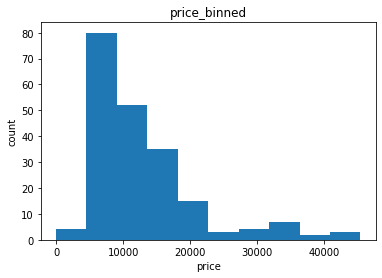

In [138]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["price"])

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price_binned")

Text(0.5, 1.0, 'price_binned')

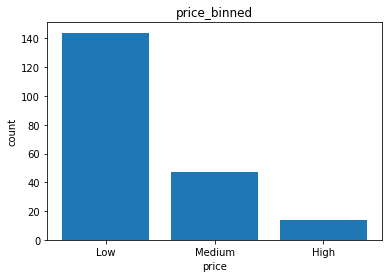

In [139]:
pyplot.bar(group_names, df["price_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price_binned")

#Turning categorical variables into quantitative variables

Most statistical models cannot take in objects or strings as input and, for model training, only take the numbers as inputs.

For example we need to convert categorical values like strings to a numerical value for they to be analize in a proper way

This technique is often called “one-hot encoding”.

##.get_dummies()

This is a method to convert categorical variables to dummy variables (0 or 1)

In [135]:
#Example, here we will generate a list of numbers which will be evaluate and assign a value of 0 if is a diesel or 1 if it is a gas type
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


#Labs completed

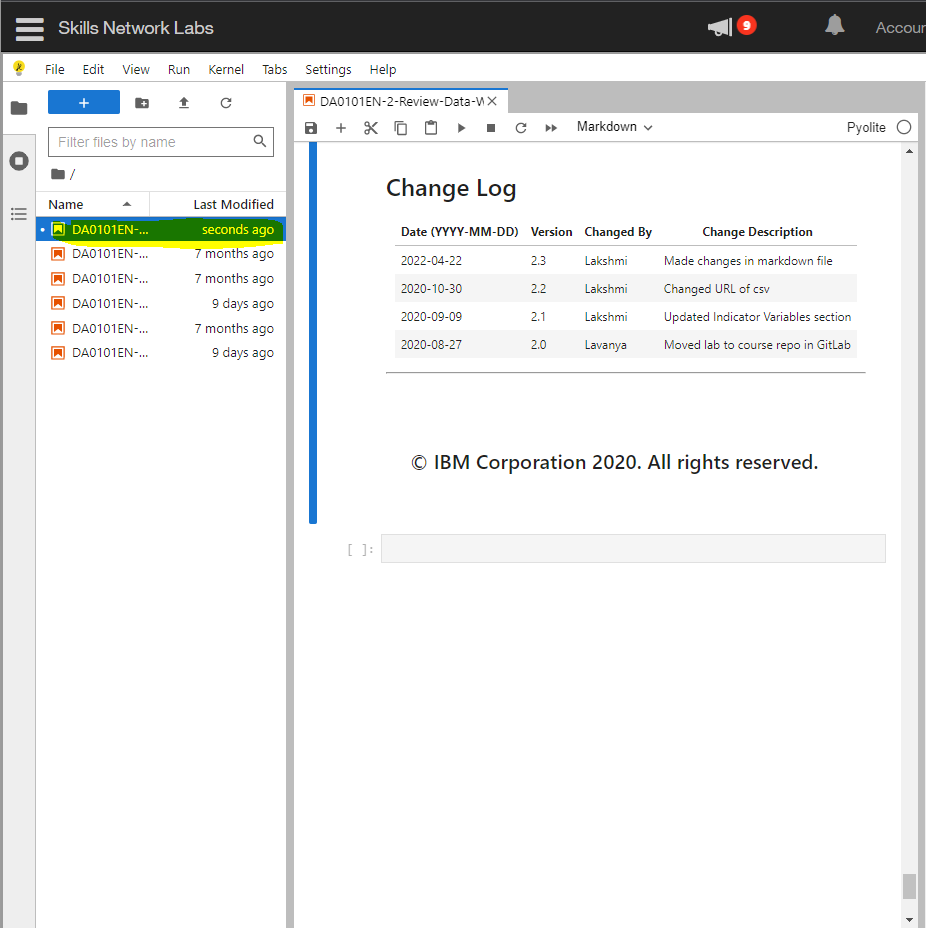